In [9]:
import os
import pandas as pd

In [10]:
a_t = pd.read_excel('autoimmune_data.xlsx', sheet_name = 2, index_col = 0)
a_b = pd.read_excel('autoimmune_data.xlsx', sheet_name = 3, index_col = 0)
c_t = pd.read_excel('cancer_data.xlsx', sheet_name = 1, index_col = 0)
c_b = pd.read_excel('cancer_data.xlsx', sheet_name = 3, index_col = 0)

In [19]:
a_b[a_b['Diseases'].str.contains('Sjo')]

,Parent Protein ID,Diseases,Parent Protein,Reference Count,Epitope Count,Assay Count,Parent Species
1526,P02671,"reactive arthritis, ankylosing spondylitis, rh...",Fibrinogen alpha chain,33,271,345,Homo sapiens
1529,P02686,"autoimmune optic neuritis, neuromyelitis optic...",Myelin basic protein,24,39,76,Homo sapiens
1539,P02751,"type 1 diabetes mellitus, mixed connective tis...",Fibronectin,8,322,333,Homo sapiens
1589,P05455,autoimmune disease of skin and connective tiss...,Lupus La protein,13,33,70,Homo sapiens
1590,P05783,"reactive arthritis, rheumatoid arthritis, psor...","Keratin, type I cytoskeletal 18",32,155,206,Homo sapiens
1601,P06733,"reactive arthritis, autoimmune disease of skin...",Alpha-enolase,33,83,146,Homo sapiens
1611,P07305,"Sjogren's syndrome, systemic lupus erythematos...",Histone H1.0,4,11,14,Homo sapiens
1653,P09012,autoimmune disease of skin and connective tiss...,U1 small nuclear ribonucleoprotein A,8,50,73,Homo sapiens
1716,P10155,"systemic lupus erythematosus, Sjogren's syndro...",60 kDa SS-A/Ro ribonucleoprotein,22,82,140,Homo sapiens
1721,P10412,"rheumatoid arthritis, juvenile ankylosing spon...",Histone H1.4,5,19,58,Homo sapiens


In [ ]:
import Pfeature.pfeature

# get features from Pfeature for whole protein
pfeatures = []
for i in Pfeature.pfeature.__dict__.keys():
    if 'btc_wp' in i:
        continue
    if 'wp' in i:
        f = getattr(Pfeature.pfeature, i)
        pfeatures.append(f)

for pfeature in pfeatures:

    name = str(pfeature).split(' ')[1]
    print(name)
    
    # additional 1 argument
    if name in ['dpc_wp']:
        pfeature('autoimmune_antigens.fasta', 'Pfeatures/autoimmune_antigens_' + name + '.csv', 1)
        pfeature('cancer_antigens.fasta', 'Pfeatures/cancer_antigens_' + name + '.csv', 1)
    elif name in ['acr_wp', 'paac_wp', 'apaac_wp', 'qos_wp', 'soc_wp', 'dpb_wp']:
        continue
    else:
        pfeature('autoimmune_antigens.fasta', 'Pfeatures/autoimmune_antigens_' + name + '.csv')
        pfeature('cancer_antigens.fasta', 'Pfeatures/cancer_antigens_' + name + '.csv')

aac_wp


In [68]:
ai_diseases = []
for i, row in ai_t_df.iterrows():
    for j in (row['Diseases'].split(', ')):
        ai_diseases.append(j)

for i, row in ai_b_df.iterrows():
    for j in (row['Diseases'].split(', ')):
        ai_diseases.append(j)
        
c_diseases = []
for i, row in c_t_df.iterrows():
    try:    
        for j in (row['Diseases'].split(', ')):
            c_diseases.append(j)
    except:
        continue

for i, row in c_b_df.iterrows():
    try:    
        for j in (row['Diseases'].split(', ')):
            c_diseases.append(j)
    except:
        continue
        
try:
    while True:
        c_diseases.remove('viral infectious disease')
except ValueError:
    pass

In [69]:
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

pd.DataFrame(dict(Counter(c_diseases).most_common()).items(), columns=['Disease', 'Antigen Count']).head(15)

,Disease,Antigen Count
0,skin melanoma,175
1,healthy,147
2,melanoma,139
3,pancreatic ductal adenocarcinoma,106
4,colorectal cancer,101
5,glioblastoma,62
6,lung non-small cell carcinoma,58
7,ovarian cancer,43
8,prostate cancer,42
9,renal cell carcinoma,39


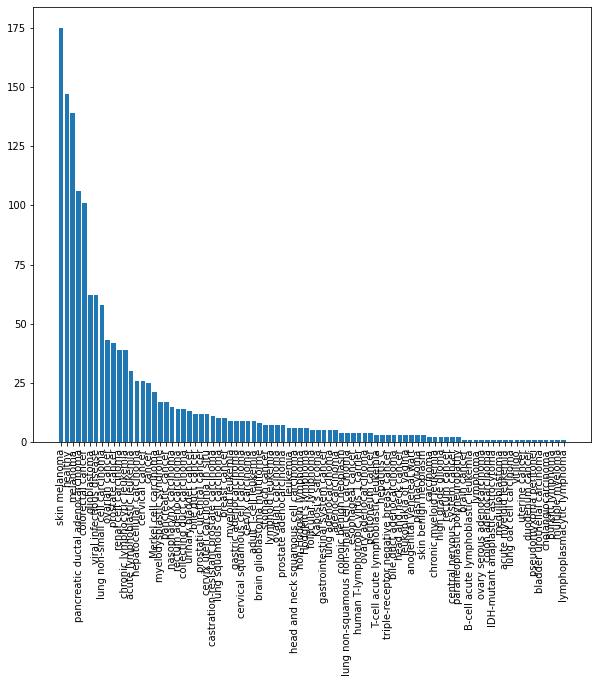

In [49]:
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 8))

d = dict(Counter(c_diseases).most_common())
names = list(d.keys())
values = list(d.values())


plt.bar(range(len(d)), values, tick_label=names)
plt.xticks(rotation=90)
plt.show()

In [70]:
len(dict(Counter(c_diseases).most_common()).keys())

86

In [61]:
len(dict(Counter(c_diseases).most_common()).keys())

87

In [73]:
df = pd.read_csv('master_data.csv', index_col=0)

a = list(df[df['category'] == 'autoimmune']['arginines'])                                                             
c = list(df[df['category'] == 'cancer']['arginines'])                                                                 
n = list(df[df['category'] == 'normal']['arginines'])    

In [75]:
import seaborn as sns

Text(0.5, 0, 'Arginine Composition (%)')

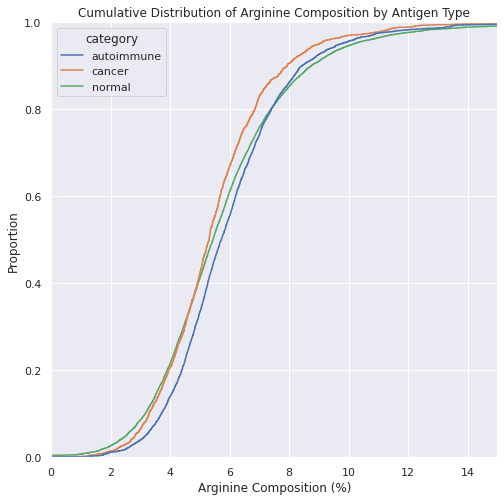

In [86]:
g = sns.ecdfplot(df, x='arginines', hue='category')
g.axes.set_title('Cumulative Distribution of Arginine Composition by Antigen Type')
sns.set(rc={"figure.figsize":(8, 8)})
g.set(xlabel='Arginine Composition (%)', xlim=[0, 15])
plt.xlabel('Arginine Composition (%)')